In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv(r"C:\Users\harshit\Downloads\classification\HR analysis\HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [13]:
df.isnull().any().sum()

0

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

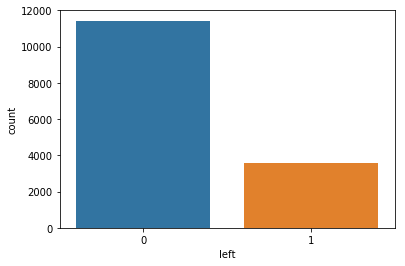

In [4]:
x=df['left']
sns.countplot(x=x,data=df)   # 0: retain , 1: left.

In [5]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
def plots(hue,plot_data):
    for i,col in enumerate(df.columns):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11,8.5)})
        ax=sns.countplot(x=df[col],hue=hue,data=df)

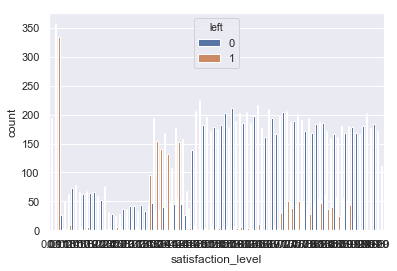

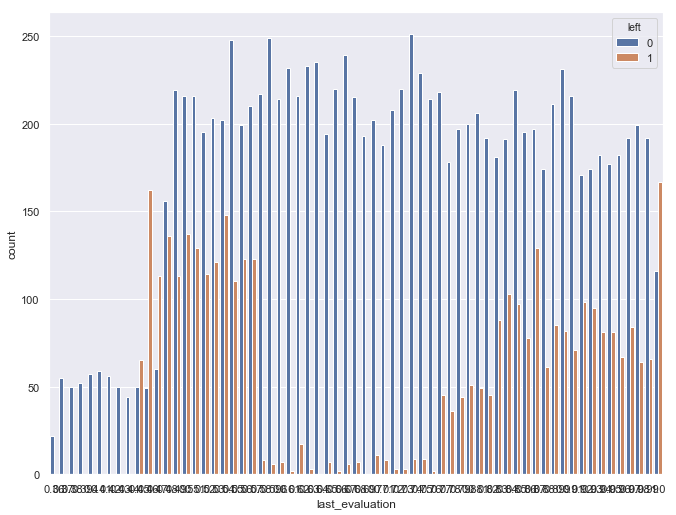

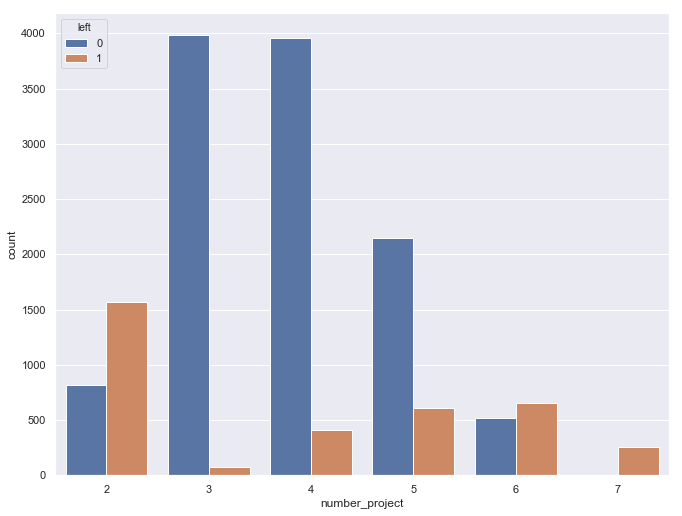

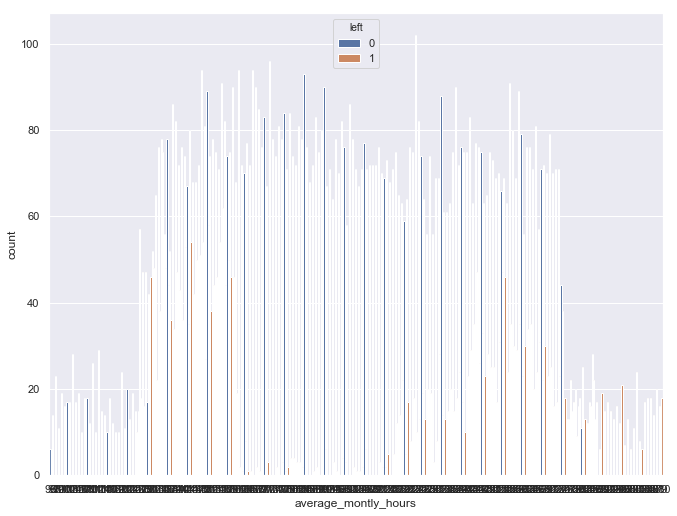

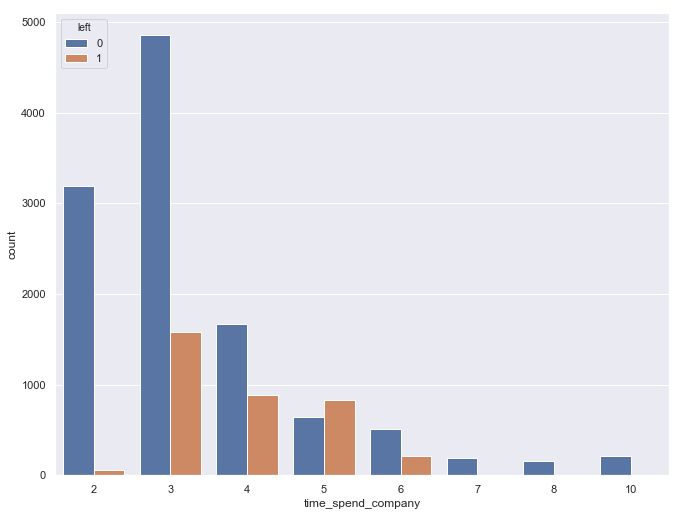

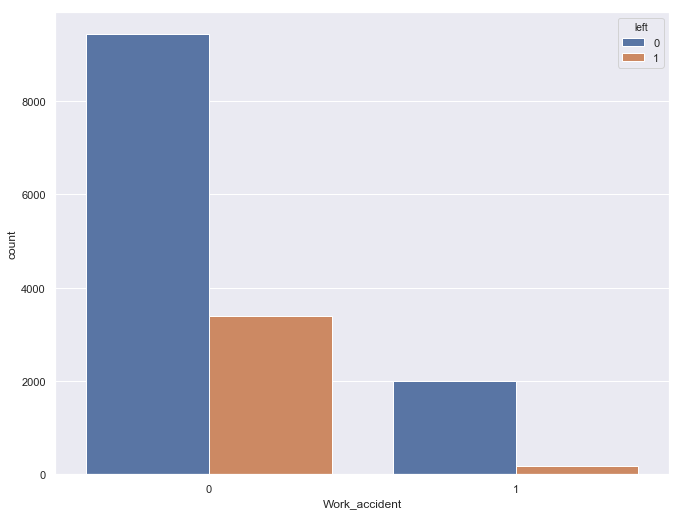

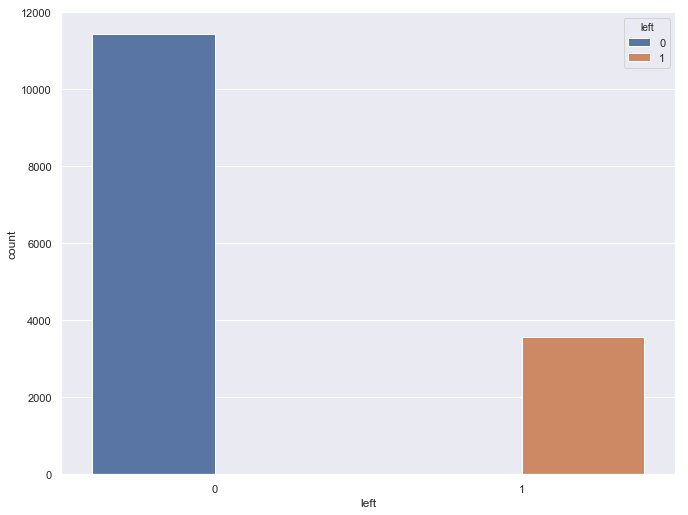

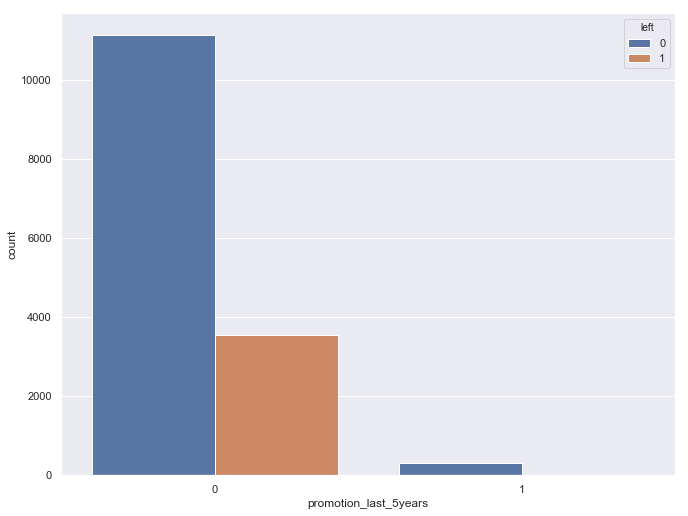

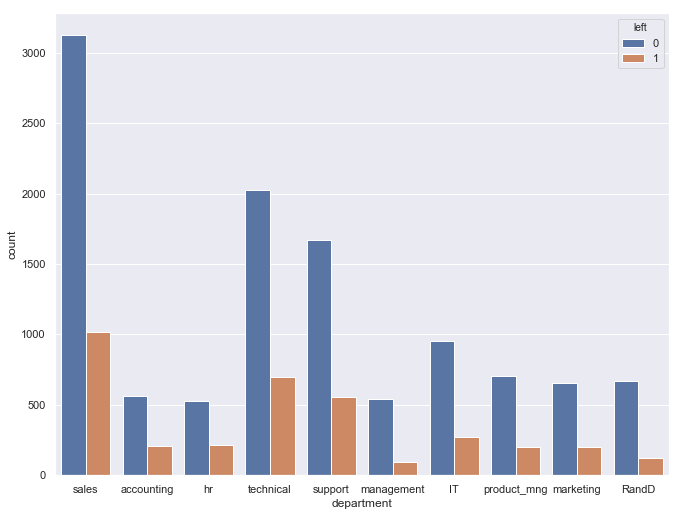

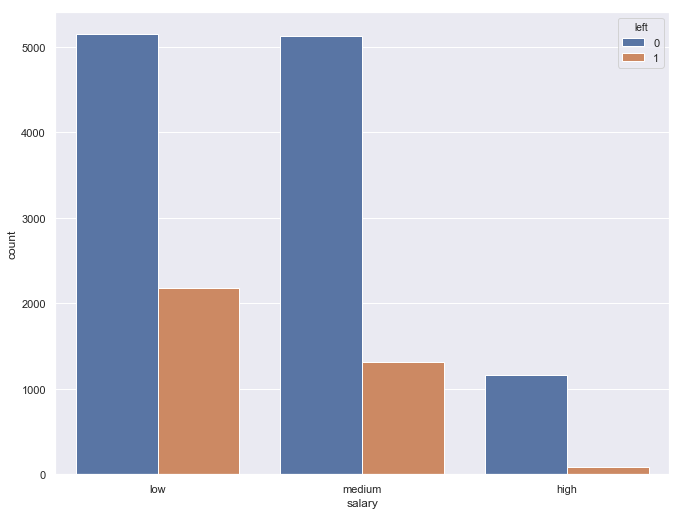

In [9]:
hue=df['left']
plot_data=df.drop('left',1)
plots(hue,plot_data)

In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['salary']=le.fit_transform(df['salary'])  # 0: high, 1: low, 2: medium salary.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [3]:
encoded_data=pd.get_dummies(df)
encoded_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [14]:
# Effect of whether someone got promoted in last 5 years?
pd.crosstab(df.promotion_last_5years, df.left )

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


In [15]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.001294
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.001318
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,1.000000


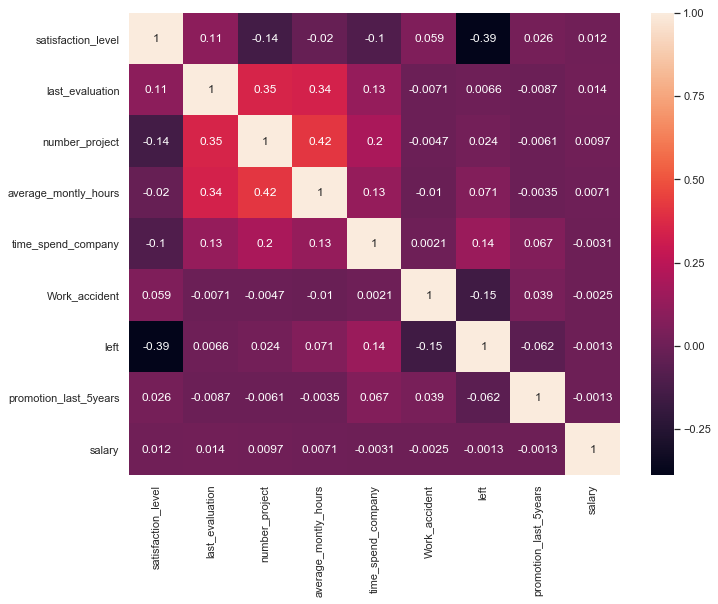

In [16]:
sns.heatmap(df.corr(),annot=True)

In [4]:
y=encoded_data['left']
x=encoded_data.drop('left',1)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# model 1: logistic regression.

In [6]:
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression()
model_1.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
y_pred_1=model_1.predict(x_test)
y_pred_1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [8]:
from sklearn import metrics
confusion_mtrx=metrics.confusion_matrix(y_test,y_pred_1)
confusion_mtrx

array([[2155,  170],
       [ 511,  164]], dtype=int64)

In [9]:
metrics.accuracy_score(y_test,y_pred_1)

0.77300000000000002

In [10]:
model_1.score(x_test,y_test)

0.77300000000000002

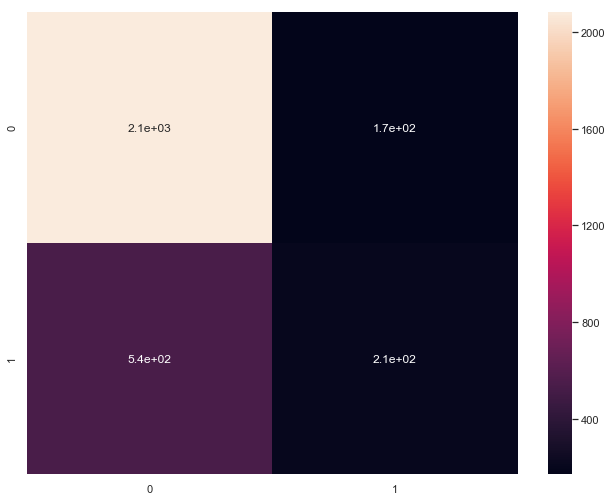

In [31]:
sns.heatmap(confusion_mtrx,annot=True)

In [11]:
y_prob=model_1.predict_proba(x_test)[:,1]
y_pred_lr=np.where(y_prob>0.5,1,0)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)
roc_auc

0.81443823178016728

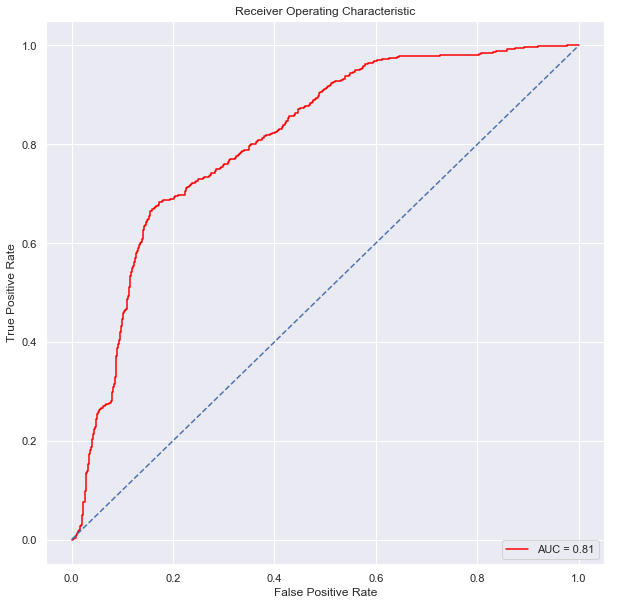

In [40]:
plot_roc(roc_auc)

# model 2: LDA

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [14]:
y_prob_lda=lda.predict_proba(x_test)[:,1]
y_pred_lda=np.where(y_prob>0.5,1,0)
y_pred_lda

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
from sklearn import metrics
confusion_mtrx_lda=metrics.confusion_matrix(y_test,y_pred_lda)
confusion_mtrx_lda

array([[2155,  170],
       [ 511,  164]], dtype=int64)

In [16]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_lda)
roc_auc_lda = auc(false_positive_rate, true_positive_rate)
roc_auc_lda


0.81152751891676633

In [17]:
lda.score(x_test,y_test)

0.77200000000000002

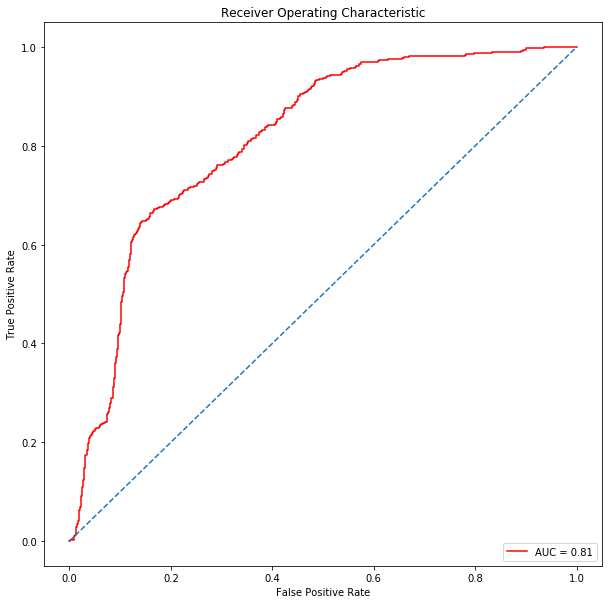

In [48]:
def plot_roc(roc_auc):
    plt.figure(figsize=(10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plot_roc(roc_auc)

# model 3: QDA

In [18]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
qda= QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [22]:
y_prob_qda=qda.predict_proba(x_test)[:,1]
y_pred_qda=np.where(y_prob>0.5,1,0)
y_pred_qda

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
c_mtrx=metrics.confusion_matrix(y_test,y_pred_qda)
c_mtrx

array([[2155,  170],
       [ 511,  164]], dtype=int64)

In [23]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_qda)
roc_auc_qda = auc(false_positive_rate, true_positive_rate)
roc_auc_qda


0.9445817602548785

In [24]:
qda.score(x_test,y_test)

0.89633333333333332

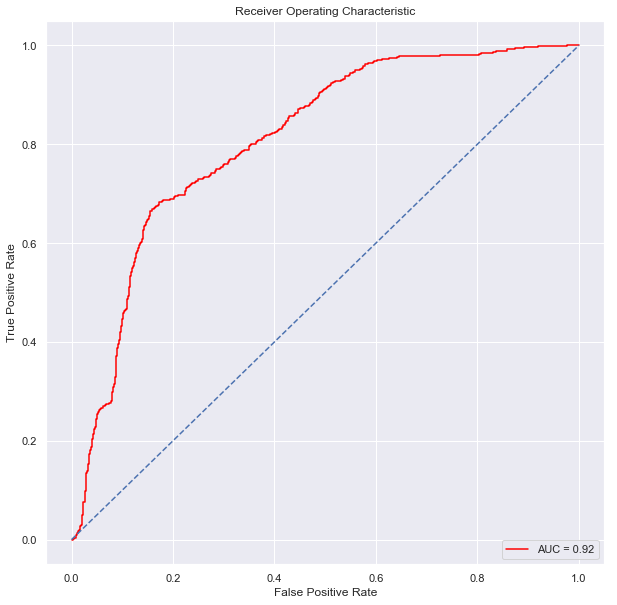

In [52]:
plot_roc(roc_auc_qda)

# model 4: SGD

In [25]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [26]:
c_mtrx=metrics.confusion_matrix(y_test,y_pred)
c_mtrx

array([[  29, 2296],
       [   0,  675]], dtype=int64)

In [27]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc_sgd = auc(false_positive_rate, true_positive_rate)
roc_auc_sgd


0.50623655913978494

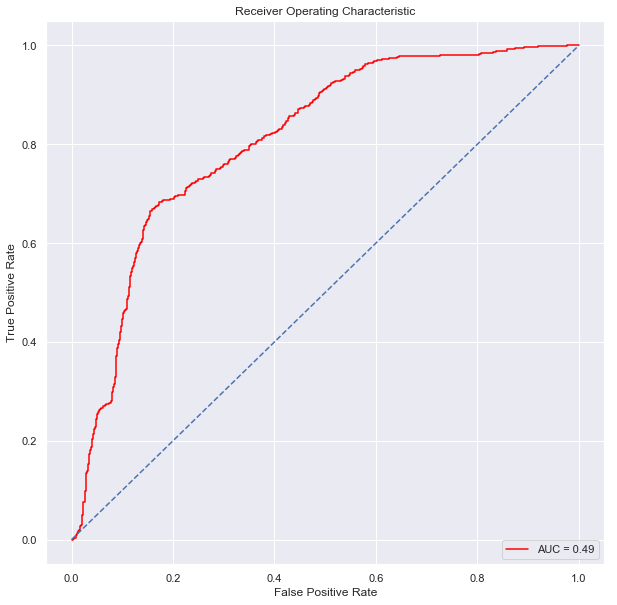

In [77]:
plot_roc(roc_auc_sgd)

# model 5: random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
rfc.predict(x_test)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [30]:
y_prob_rfc=rfc.predict_proba(x_test)[:,1]
y_pred_rfc=np.where(y_prob>0.5,1,0)
y_pred_rfc

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
c_mtrx=metrics.confusion_matrix(y_test,y_pred_rfc)
c_mtrx

array([[2155,  170],
       [ 511,  164]], dtype=int64)

In [32]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_rfc)
roc_auc_rfc = auc(false_positive_rate, true_positive_rate)
roc_auc_rfc


0.99277100756670644

In [33]:
rfc.score(x_test,y_test)

0.99099999999999999

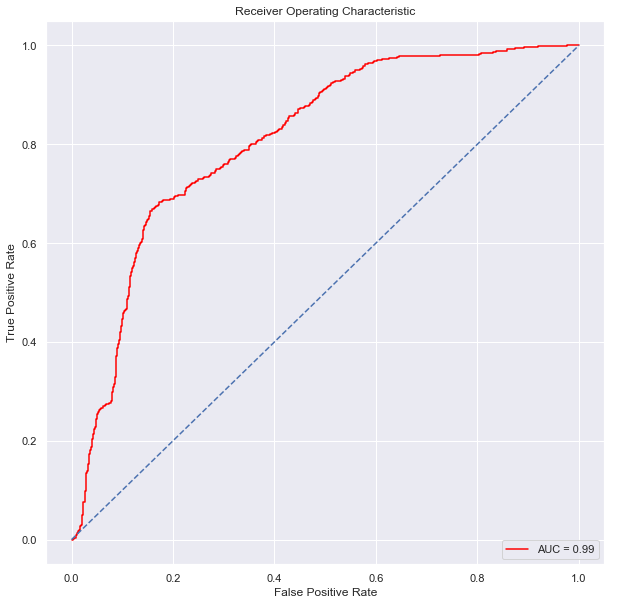

In [78]:
plot_roc(roc_auc_rfc)

# model 6: decision trees

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(3, 15)}
dtc = DecisionTreeClassifier()
tree = GridSearchCV(dtc, param_grid, cv = 10)
tree.fit( x_train, y_train)
print(tree.best_params_,tree.best_score_)



{'max_depth': 9} 0.980165013751


In [54]:
# building new model

new_tree = DecisionTreeClassifier( max_depth = 9 )
new_tree.fit( x_train, y_train )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
new_tree.predict(x_test)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [55]:
y_prob_dtc=new_tree.predict_proba(x_test)[:,1]
y_pred_dtc=np.where(y_prob>0.5,1,0)
y_pred_dtc

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
c_mtrx=metrics.confusion_matrix(y_test,y_pred_dtc)
c_mtrx

array([[2155,  170],
       [ 511,  164]], dtype=int64)

In [58]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_dtc)
roc_auc_dtc = auc(false_positive_rate, true_positive_rate)
roc_auc_dtc


0.98331947431302269

In [59]:
new_tree.score(x_test,y_test)

0.98099999999999998

In [61]:
from sklearn.tree import export_graphviz, export

In [62]:
export_graphviz( new_tree,
              out_file = "hr_tree.odt",
              feature_names = x_train.columns )

In [63]:
import pydotplus as pdot

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'hr_tree.odt' )

In [64]:
chd_tree_graph.write_jpg( 'hr_tree.jpg' )

True

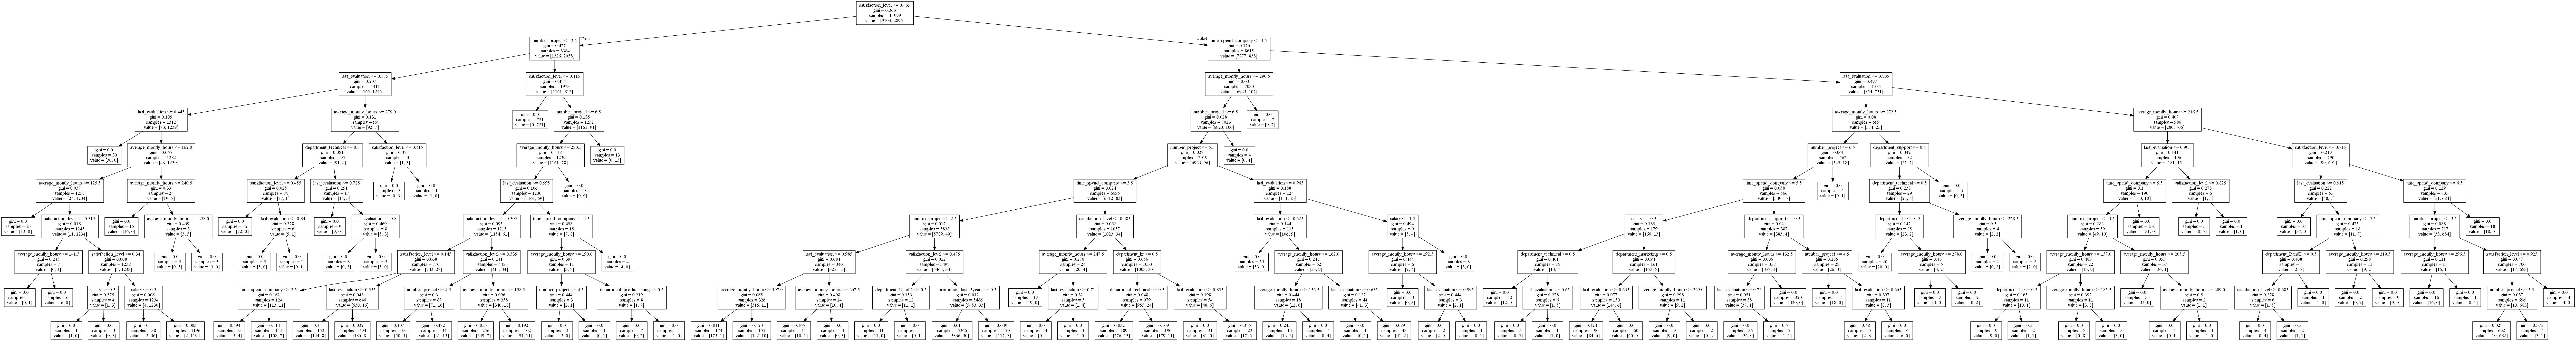

In [65]:
from IPython.display import Image
Image(filename='hr_tree.jpg')

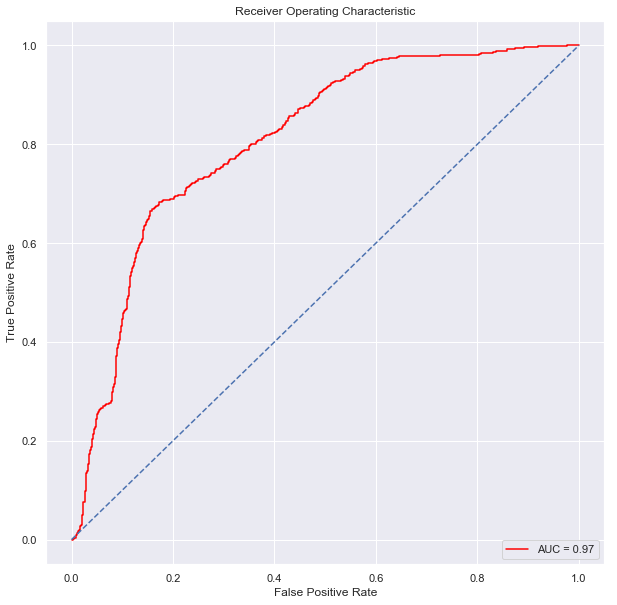

In [84]:
plot_roc(roc_auc_dtc)

# model : SVM

In [85]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [87]:
y_pred_svc=svc.predict(x_test)
y_pred_svc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
c_mtrx=metrics.confusion_matrix(y_test,y_pred_svc)
c_mtrx

array([[2081,  170],
       [ 542,  207]], dtype=int64)

In [89]:
svc.score(x_test,y_test)

0.77866666666666662

# model: Naive bayes

In [94]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [95]:
gnb.predict(x_test)

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [110]:
y_prob_gnb=gnb.predict_proba(x_test)[:,1]
y_pred_gnb=np.where(y_prob>0.5,1,0)
y_pred_gnb

array([0, 0, 0, ..., 0, 0, 0])

In [111]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_gnb)
roc_auc_gnb = auc(false_positive_rate, true_positive_rate)
roc_auc_gnb

0.82232077243224944

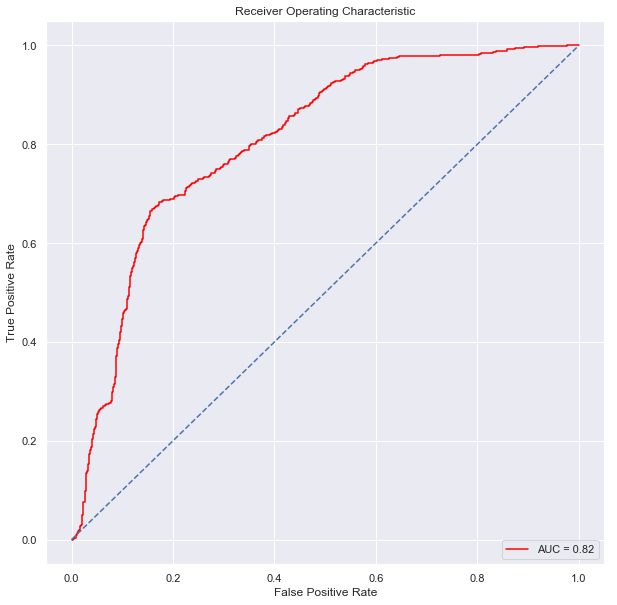

In [112]:
plot_roc(roc_auc_gnb)

# model : KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [67]:
knn.predict(x_test)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [68]:
y_prob_knn=knn.predict_proba(x_test)[:,1]
y_pred_knn=np.where(y_prob>0.5,1,0)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
c_mtrx=metrics.confusion_matrix(y_test,y_pred_knn)
c_mtrx

array([[2155,  170],
       [ 511,  164]], dtype=int64)

In [70]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(false_positive_rate, true_positive_rate)
roc_auc_knn

0.9717887694145757

In [71]:
knn.score(x_test,y_test)

0.94033333333333335

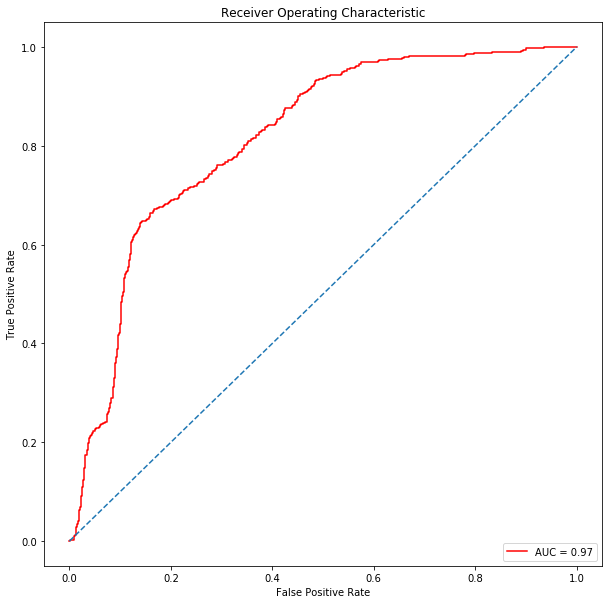

In [49]:
plot_roc(roc_auc_knn)

# model: perceptron

In [118]:
from sklearn.linear_model import Perceptron
ppt = Perceptron(max_iter=5)
ppt.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=5, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [119]:
y_pred_ppt=ppt.predict(x_test)
y_pred_ppt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [120]:
ppt.score(x_test,y_test)

0.7503333333333333

# importance feature of random forest

In [122]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [123]:
importances

,importance
feature,
satisfaction_level,0.314
time_spend_company,0.190
number_project,0.178
average_montly_hours,0.152
last_evaluation,0.125
salary,0.011
Work_accident,0.010
department_technical,0.004
department_sales,0.003


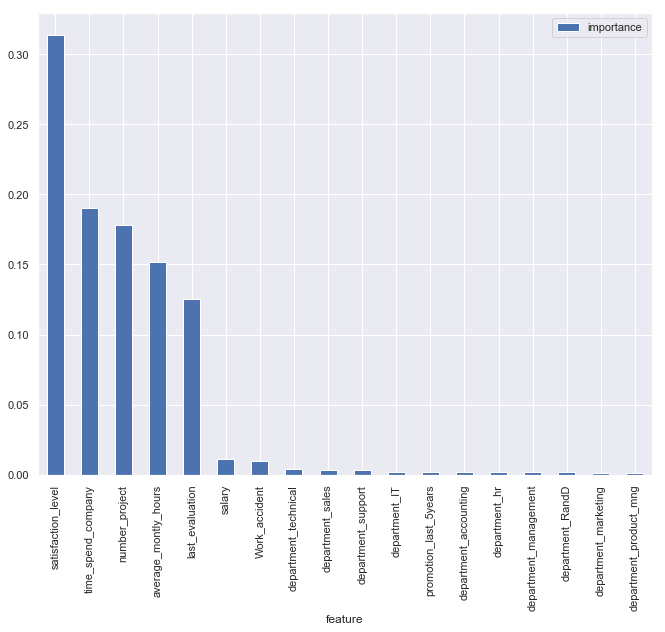

In [125]:
importances.plot.bar()